In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart.csv.csv")

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [3]:
df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
for i in list(df.columns):
    print(i , ": " , df[i].value_counts().shape[0])

age :  41
sex :  2
cp :  4
trtbps :  49
chol :  152
fbs :  2
restecg :  3
thalachh :  91
exng :  2
oldpeak :  40
slp :  3
caa :  5
thall :  4
output :  2


In [6]:
categorical_features =["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]
numerical_features = ["age","trtbps","chol","thalachh","oldpeak","output"]
num_feat = ["age","trtbps","chol","thalachh","oldpeak"]

In [7]:
df_categorical = df[categorical_features]
df_numerical = df[numerical_features]
data_num = df[num_feat]

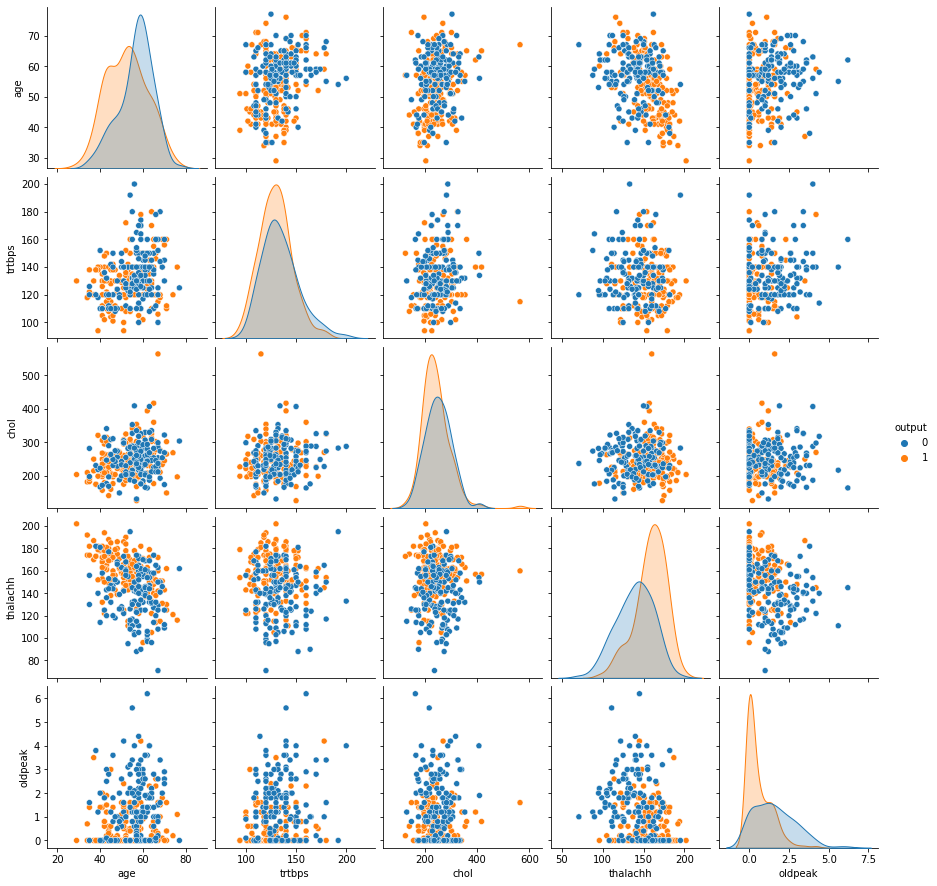

In [9]:
sns.pairplot(data = df_numerical, hue = "output", diag_kind="kde")
plt.show()

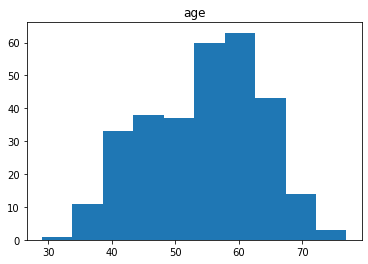

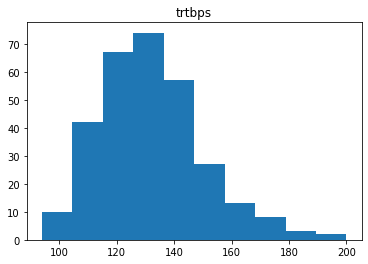

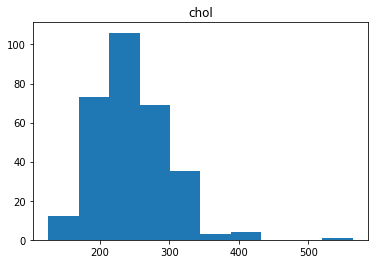

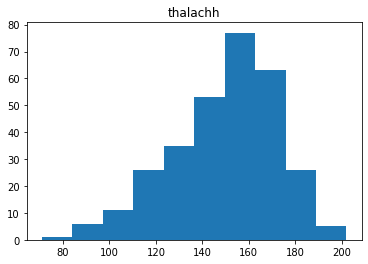

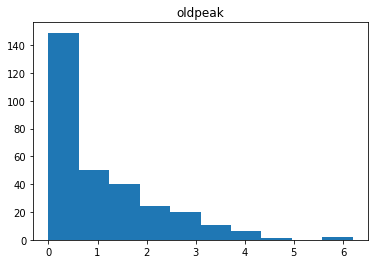

In [10]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

               age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.279351  0.213678 -0.398522  0.210013
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216
chol      0.213678  0.123174  1.000000 -0.009940  0.053952
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000


<AxesSubplot:>

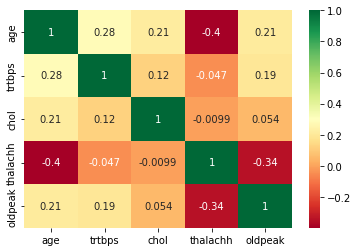

In [11]:
print(data_num.corr())
sns.heatmap(data_num.corr(), annot=True, cmap='RdYlGn')

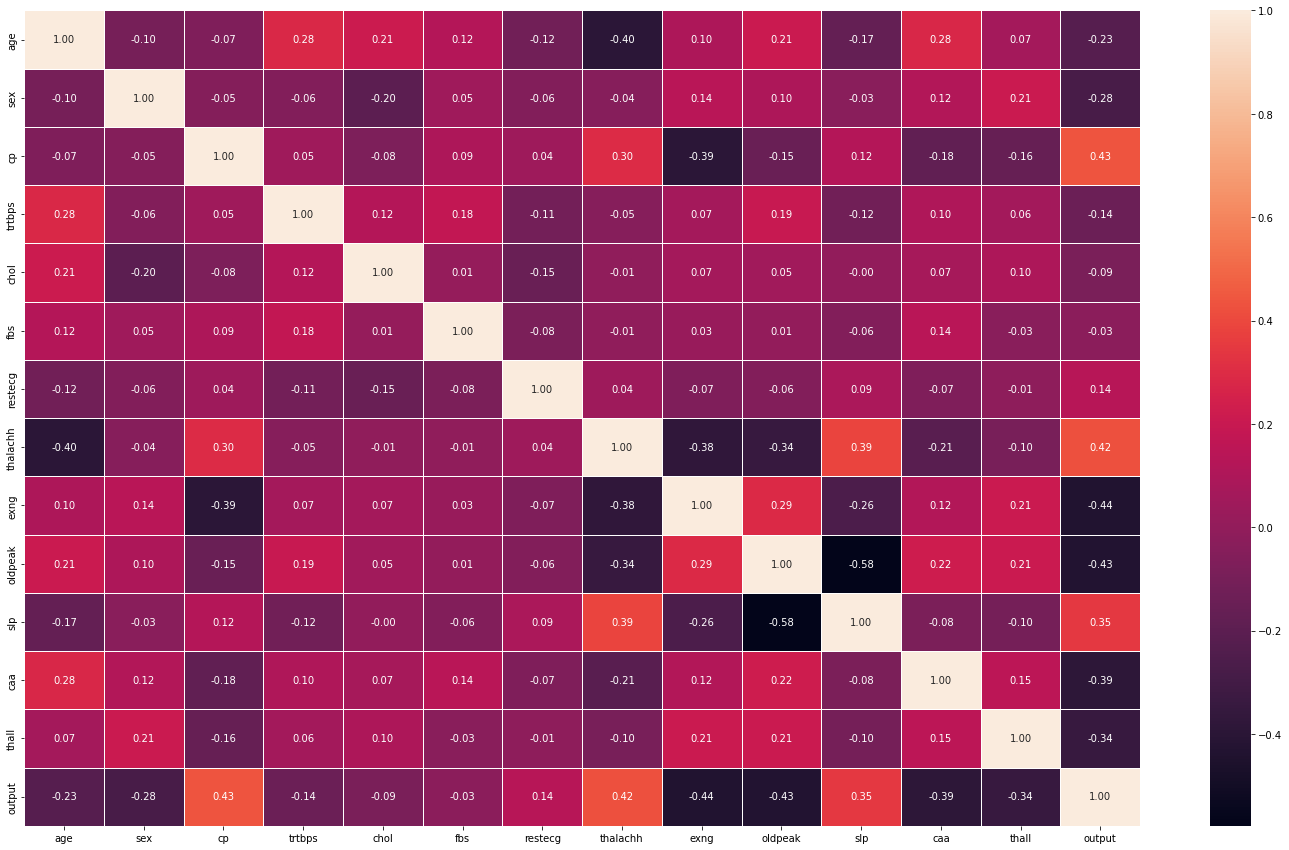

In [12]:
plt.figure(figsize=(25,15))
sns.heatmap(data=df.corr(),annot=True, fmt=".2f",linewidths=.9)
plt.show()

In [13]:
pd.pivot_table(df, index='output', values = ['age','trtbps','chol','thalachh','oldpeak'])

,age,chol,oldpeak,thalachh,trtbps
output,,,,,
0,56.601449,251.086957,1.585507,139.101449,134.398551
1,52.496970,242.230303,0.583030,158.466667,129.303030


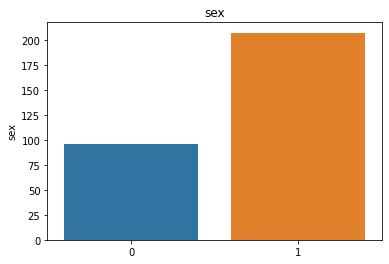

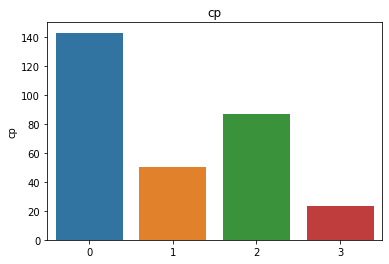

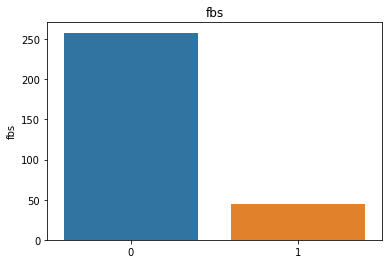

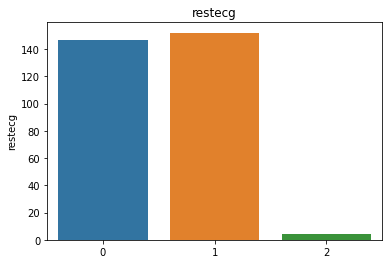

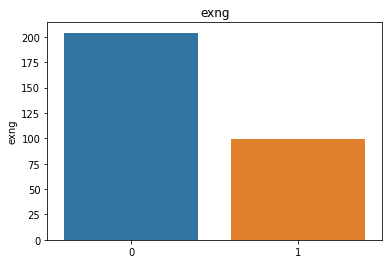

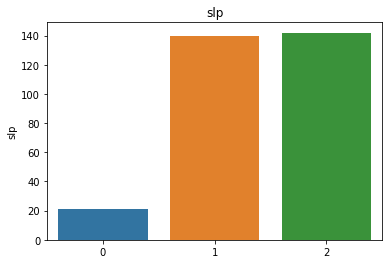

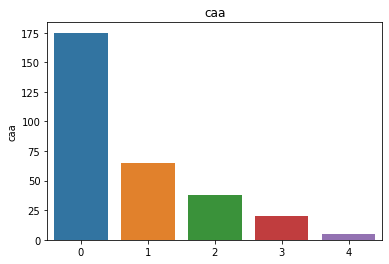

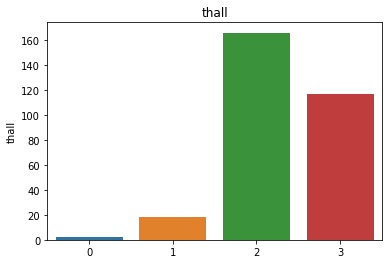

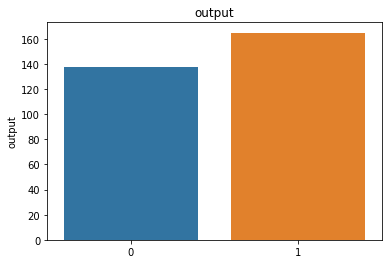

In [14]:
for i in df_categorical.columns:
    sns.barplot(x=df_categorical[i].value_counts().index,y=df_categorical[i].value_counts()).set_title(i)
    plt.show()

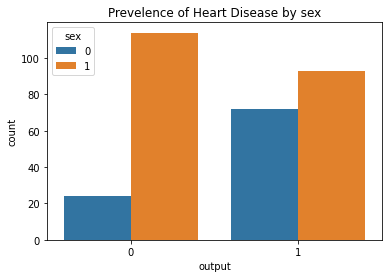

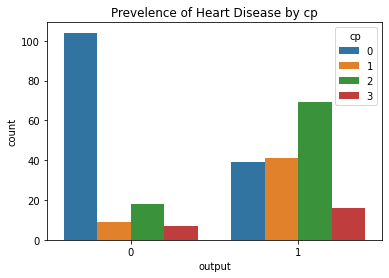

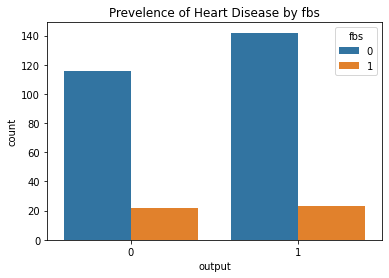

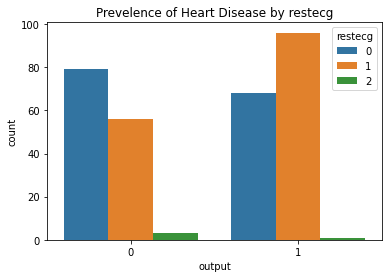

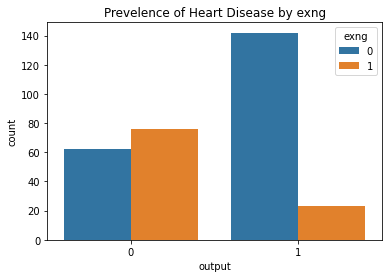

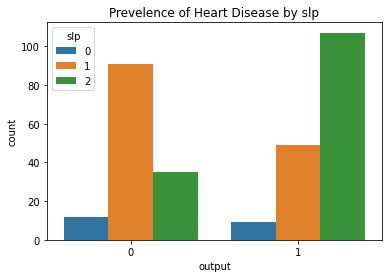

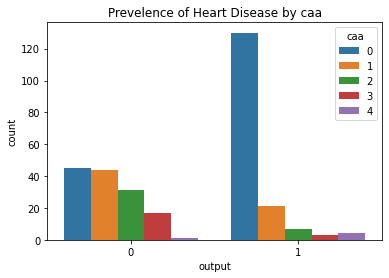

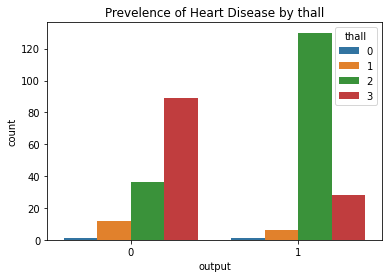

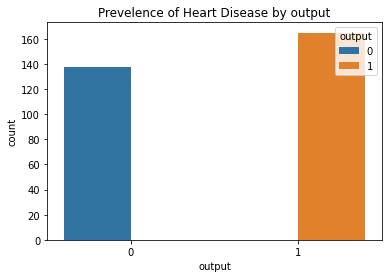

In [15]:
for i in df_categorical.columns:
    plt.title('Prevelence of Heart Disease by '+i)
    sns.countplot(x=df['output'],hue=df_categorical[i])
    plt.show()

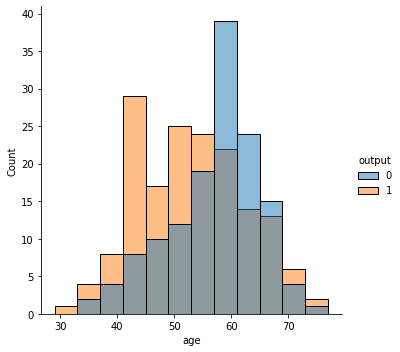

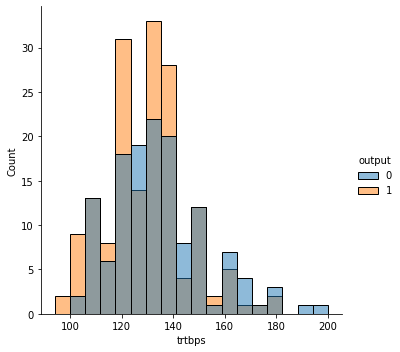

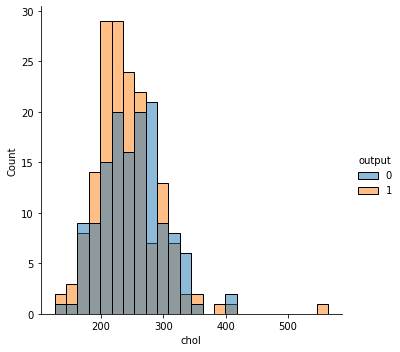

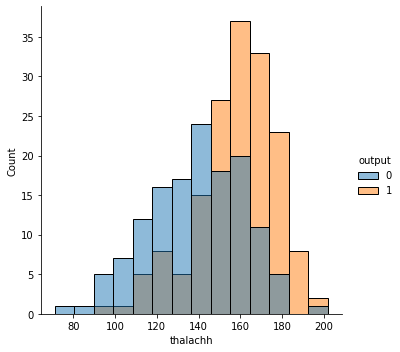

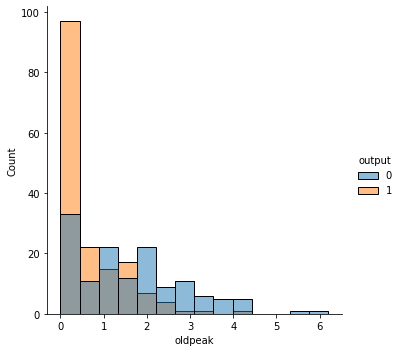

In [17]:
for i in data_num.columns:
    sns.displot(data_num, x=i, hue=df['output'])
    plt.show()

# Models

Identify the outliers and normalise them 

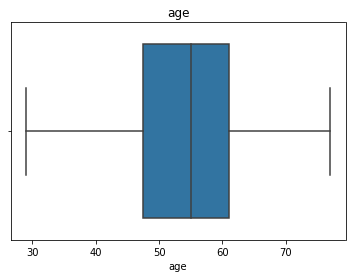

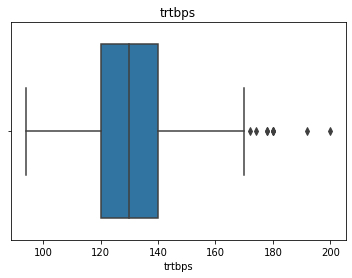

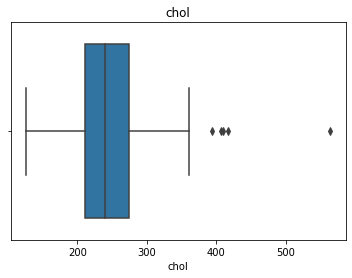

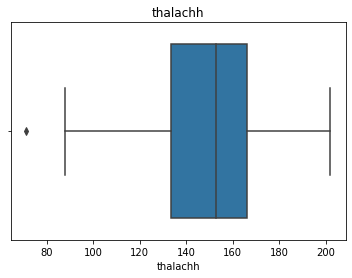

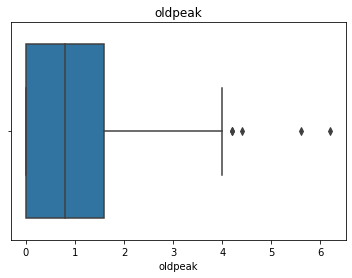

In [20]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

In [21]:
def outlinefree(dataCol):
    # sorting column
    sorted(dataCol)
    
    # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
    Q1,Q3 = np.percentile(dataCol,[25,75])
    
    # getting IQR (interquartile range)
    IQR = Q3-Q1
    
    # getting Lower range error
    LowerRange = Q1-(1.5 * IQR)
    
    # getting upper range error
    UpperRange = Q3+(1.5 * IQR)
    
    # return Lower range and upper range.
    return LowerRange,UpperRange

In [22]:
lwtrtbps,uptrtbps = outlinefree(df['trtbps'])
lwchol,upchol = outlinefree(df['chol'])
lwoldpeak,upoldpeak = outlinefree(df['oldpeak'])

In [24]:
df['trtbps'].replace(list(df[df['trtbps'] > uptrtbps].trtbps) ,uptrtbps,inplace=True)
df['chol'].replace(list(df[df['chol'] > upchol].chol) ,upchol,inplace=True)
df['oldpeak'].replace(list(df[df['oldpeak'] > upoldpeak].oldpeak) ,upoldpeak,inplace=True)

Feature Engineering

In [25]:
features = df.iloc[:,:-1].values
label = df.iloc[:,-1].values

Import Machine Learning Libraries

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

Logistic Regression

test score: 0.9210526315789473 train score: 0.8281938325991189 

 f1 score:  0.9268292682926829 

 precision score:  0.95 

 recall score:  0.9047619047619048 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.95      0.90      0.93        42

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



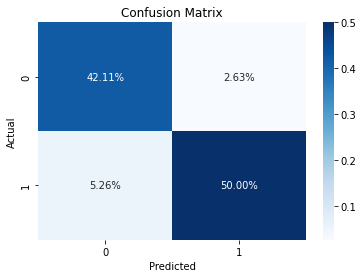

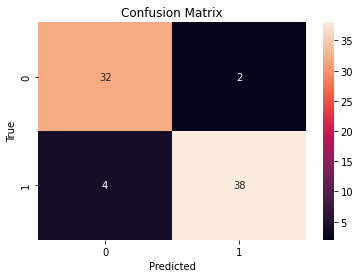

In [27]:
#------------------------LogisticRegression-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=102)

classimodel= LogisticRegression()  
classimodel.fit(X_train, y_train)
trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

y_pred =  classimodel.predict(X_test)

cm=confusion_matrix(y_test, y_pred)

print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(cm,annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

Navies Baies

test score: 0.8947368421052632 train score: 0.8370044052863436 

 f1 score:  0.9090909090909092 

 precision score:  0.8888888888888888 

 recall score:  0.9302325581395349 

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.89      0.93      0.91        43

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



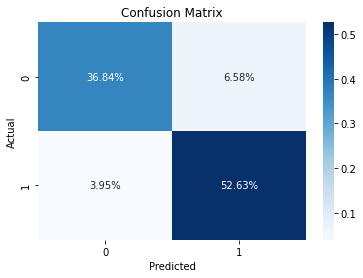

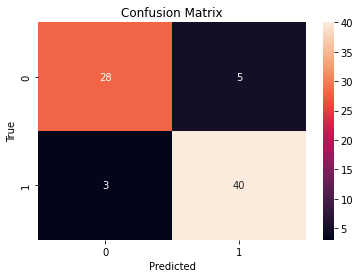

In [28]:
#------------------------Navies Baies-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=34)

NBmodel= GaussianNB()  
NBmodel.fit(X_train, y_train)

trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

y_predNB =  NBmodel.predict(X_test)

cm=confusion_matrix(y_test, y_predNB)

print(' f1 score: ',f1_score(y_test, y_predNB),'\n')
print(' precision score: ',precision_score(y_test, y_predNB),'\n')
print(' recall score: ',recall_score(y_test, y_predNB),'\n')
print(classification_report(y_test, y_predNB))

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(cm,annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()



Decision Tree

test score: 0.8552631578947368 train score: 0.8370044052863436 

 f1 score:  0.8791208791208791 

 precision score:  0.8333333333333334 

 recall score:  0.9302325581395349 

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



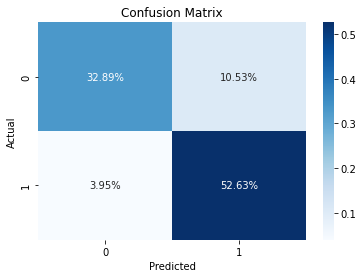

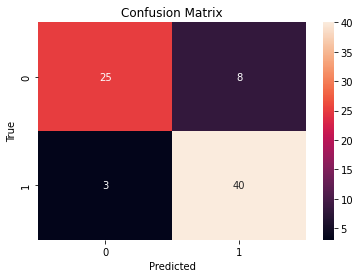

In [29]:
#------------------------Decision Tree-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=34)

tree_classifier= DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2) 
tree_classifier.fit(X_train, y_train)

trainscore =  tree_classifier.score(X_train,y_train)
testscore =  tree_classifier.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

y_predDtree =  tree_classifier.predict(X_test)

cm=confusion_matrix(y_test, y_predDtree)

print(' f1 score: ',f1_score(y_test, y_predDtree),'\n')
print(' precision score: ',precision_score(y_test, y_predDtree),'\n')
print(' recall score: ',recall_score(y_test, y_predDtree),'\n')
print(classification_report(y_test, y_predDtree))

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(cm,annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

Random Forest

test score: 0.8947368421052632 train score: 0.947136563876652 

 f1 score:  0.9111111111111112 

 precision score:  0.8723404255319149 

 recall score:  0.9534883720930233 

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.87      0.95      0.91        43

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



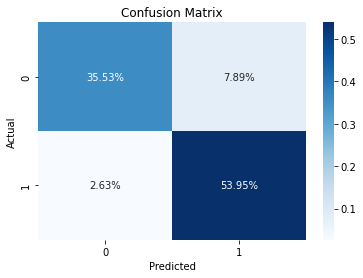

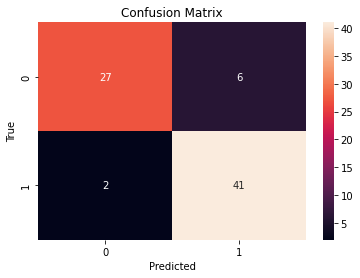

In [30]:
#------------------------Random Forest-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=34)

randomforest_model = RandomForestClassifier(max_depth=5, random_state=2) 
randomforest_model.fit(X_train, y_train)

trainscore =  randomforest_model.score(X_train,y_train)
testscore =  randomforest_model.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

y_predRforest =  randomforest_model.predict(X_test)

cm=confusion_matrix(y_test, y_predRforest)

print(' f1 score: ',f1_score(y_test, y_predRforest),'\n')
print(' precision score: ',precision_score(y_test, y_predRforest),'\n')
print(' recall score: ',recall_score(y_test, y_predRforest),'\n')
print(classification_report(y_test, y_predRforest))

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(cm,annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

test score: 0.6973684210526315 train score: 0.6431718061674009 

 f1 score:  0.7766990291262136 

 precision score:  0.6666666666666666 

 recall score:  0.9302325581395349 

              precision    recall  f1-score   support

           0       0.81      0.39      0.53        33
           1       0.67      0.93      0.78        43

    accuracy                           0.70        76
   macro avg       0.74      0.66      0.65        76
weighted avg       0.73      0.70      0.67        76



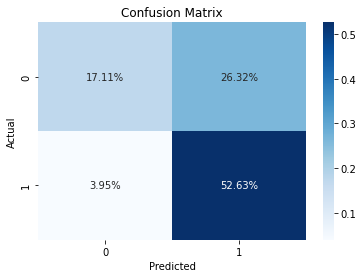

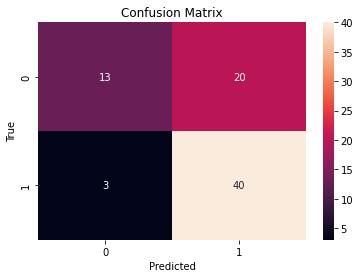

In [33]:
#------------------------Support Vector Mechanism-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=34)

svm_model = SVC(random_state=1)
svm_model.fit(X_train,y_train)

trainscore =  svm_model.score(X_train,y_train)
testscore =  svm_model.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

y_predSvm =  svm_model.predict(X_test)

cm=confusion_matrix(y_test, y_predSvm)

print(' f1 score: ',f1_score(y_test, y_predSvm),'\n')
print(' precision score: ',precision_score(y_test, y_predSvm),'\n')
print(' recall score: ',recall_score(y_test, y_predSvm),'\n')
print(classification_report(y_test, y_predSvm))

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(cm,annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()